<a href="https://colab.research.google.com/github/KaueAbbe/Projeto-Estude_Python/blob/main/Estude%20Machine%20Learning/Clustering/K_means_Recomendador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size = 6 color ='blue'> Aprendendo Clusters: Interpretação e uso em Recomendador de Músicas </font>

Este notebook se baseou em dois cursos da alura cursos online:
1.  Clustering aplicado: Recomendando Música com K-means
2. Ainda irei Fazer e Anotar

As bibliotecas que serão usadas:
1. Pandas e Numpy
2. Scikit-learn
3. Plotly
4. Spotipy
5. matplotlib

**OBJETIVO:**
Compreender a utilização do K-means para criar clusters e utilizá-lo como recomendador de músicas. Objetiva-se compreender a biblioteca k-means e os meios que a biblioteca funciona, cria um recomendador e interpretá-lo.

**RESUMO DO QUE FOI FEITO:** \\
Análise de dados: retirei colunas, compreendi datas, escalas e variáveis por meio de grafos e verificação visualização técnica. \\

* *Alteração dos Dados*: Realizei normalização, redusão de dimensionalidade, e transformação de dados de texto em 0 e 1. \\

* *Criação dos Clusterings*: Realizei dois clusterings, por gênero e música para compreender as diferenças e semelhanças. Para o cluster por música houve a diferença de alterar a colunas de artistas. 

* *Criação do Recomendador*: Criei um recomendador que ao passar o nome da música e do artista retorna 10 músicas recomendadas por proximidade dentro do mesmo cluster. O retorna é feito em forma de imagens do álbum com nome da música, que são obtidas pela API do Spotify (spotipy). 

**Consideração Final:**
O sistema de recomendação é feita a partir do método de Clustering. Ocorre a criação de grupos que distam entre si e entre os pontos de cada música. Para recomendar uma música foi utilizada o método de menor distância entre a música e as outras. 

O que pode ser adicionado é a verificação da qualidade do Clusters, importante para qualificar o aprendizado. Pode ser adicionada uma técnica NLP para não depender de uma escrita idêntica aos dos dados. Aumenta o cálculo de distância pois existem diversos parâmetros de distância do cluster, e foram usados apenas 2/3.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Analisando Dados

Nesta etapa eu busquei entender quais são meus dados, como eles informam e descrevem as músicas, e se existem algum detalhes nos dados que posso tornar imprecisa o clustering ou atrapalhar. 

In [2]:
import pandas as pd
import numpy as np

In [3]:
dados_gerais = pd.read_csv('/content/drive/MyDrive/Python/Machine Learning/Dados_totais.csv')
dados_genero = pd.read_csv('/content/drive/MyDrive/Python/Machine Learning/data_by_genres.csv')
dados_ano = pd.read_csv('/content/drive/MyDrive/Python/Machine Learning/data_by_year.csv')

In [4]:
dados_gerais.head(2)

valence  year  acousticness   artists  danceability  duration_ms  energy  \
0    0.285  2000       0.00239  Coldplay         0.429       266773   0.661   
1    0.613  2000       0.14300   OutKast         0.843       270507   0.806   

   explicit                      id  instrumentalness  key  liveness  \
0         0  3AJwUDP919kvQ9QcozQPxg          0.000121   11    0.2340   
1         1  0I3q5fE6wg7LIfHGngUTnV          0.000000    4    0.0771   

   loudness  mode         name  popularity  speechiness    tempo  \
0    -7.227     1       Yellow          84       0.0281  173.372   
1    -5.946     0  Ms. Jackson          80       0.2690   94.948   

            artists_song  
0      Coldplay - Yellow  
1  OutKast - Ms. Jackson

In [5]:
dados_gerais['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [6]:
dados_gerais.shape

(20311, 19)

As colunas key, mode, excplicit não fornecem distinção entre as músicas. Por isso podem ser excluídas

In [7]:
dados_gerais.drop(['key','explicit','mode',], axis = 1, inplace = True)

In [8]:
dados_gerais.head()

valence  year  acousticness       artists  danceability  duration_ms  \
0    0.285  2000       0.00239      Coldplay         0.429       266773   
1    0.613  2000       0.14300       OutKast         0.843       270507   
2    0.400  2000       0.00958   Linkin Park         0.556       216880   
3    0.543  2000       0.00664  3 Doors Down         0.545       233933   
4    0.760  2000       0.03020        Eminem         0.949       284200   

   energy                      id  instrumentalness  liveness  loudness  \
0   0.661  3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227   
1   0.806  0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946   
2   0.864  60a0Rd6pjrkxjPbaKzXjfq          0.000000    0.2090    -5.870   
3   0.865  6ZOBP3NvffbU4SZcrnt1k6          0.000011    0.1680    -5.708   
4   0.661  3yfqSUWxFvZELEM4PmlwIR          0.000000    0.0454    -4.244   

                  name  popularity  speechiness    tempo  \
0               Yellow          84       0.0281  173.372   
1          Ms. Jackson          80       0.2690   94.948   
2           In the End          84       0.0584  105.143   
3           Kryptonite          78       0.0286   99.009   
4  The Real Slim Shady          80       0.0572  104.504   

                   artists_song  
0             Coldplay - Yellow  
1         OutKast - Ms. Jackson  
2      Linkin Park - In the End  
3     3 Doors Down - Kryptonite  
4  Eminem - The Real Slim Shady

In [9]:
dados_gerais.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
id                  0
instrumentalness    0
liveness            0
loudness            0
name                0
popularity          0
speechiness         0
tempo               0
artists_song        0
dtype: int64

In [10]:
dados_gerais.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
id                  0
instrumentalness    0
liveness            0
loudness            0
name                0
popularity          0
speechiness         0
tempo               0
artists_song        0
dtype: int64

In [11]:
dados_genero.head(2)

mode                  genres  acousticness  danceability   duration_ms  \
0     1  21st century classical      0.979333      0.162883  1.602977e+05   
1     1                   432hz      0.494780      0.299333  1.048887e+06   

     energy  instrumentalness  liveness   loudness  speechiness       tempo  \
0  0.071317          0.606834    0.3616 -31.514333     0.040567   75.336500   
1  0.450678          0.477762    0.1310 -16.854000     0.076817  120.285667   

    valence  popularity  key  
0  0.103783   27.833333    6  
1  0.221750   52.500000    5

In [12]:
dados_genero.drop(['key','mode',], axis = 1, inplace = True)
dados_genero.head(2)

genres  acousticness  danceability   duration_ms    energy  \
0  21st century classical      0.979333      0.162883  1.602977e+05  0.071317   
1                   432hz      0.494780      0.299333  1.048887e+06  0.450678   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.606834    0.3616 -31.514333     0.040567   75.336500  0.103783   
1          0.477762    0.1310 -16.854000     0.076817  120.285667  0.221750   

   popularity  
0   27.833333  
1   52.500000

In [13]:
dados_genero.isna().sum()

genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

In [14]:
dados_genero.isna().sum()

genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

In [15]:
dados_ano.head(2)

mode  year  acousticness  danceability    duration_ms    energy  \
0     1  1921      0.886896      0.418597  260537.166667  0.231815   
1     1  1922      0.938592      0.482042  165469.746479  0.237815   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.344878   0.20571 -17.048667     0.073662  101.531493  0.379327   
1          0.434195   0.24072 -19.275282     0.116655  100.884521  0.535549   

   popularity  key  
0    0.653333    2  
1    0.140845   10

In [16]:
dados_ano['year'].unique()

array([1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020])

In [17]:
dados_ano = dados_ano[dados_ano['year']>= 2000]
dados_ano['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [18]:
dados_ano.drop(['mode','key'], axis = 1, inplace = True)
dados_ano.head(2)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


year  acousticness  danceability    duration_ms    energy  \
79  2000      0.289323      0.590918  242724.642638  0.625413   
80  2001      0.286842      0.583318  240307.796010  0.626986   

    instrumentalness  liveness  loudness  speechiness       tempo   valence  \
79          0.101168  0.197686 -8.247766     0.089205  118.999323  0.559475   
80          0.107214  0.187026 -8.305095     0.089182  117.765399  0.541479   

    popularity  
79   46.684049  
80   48.750125

In [19]:
dados_ano = dados_ano.reset_index()

In [20]:
dados_ano

index  year  acousticness  danceability    duration_ms    energy  \
0      79  2000      0.289323      0.590918  242724.642638  0.625413   
1      80  2001      0.286842      0.583318  240307.796010  0.626986   
2      81  2002      0.282624      0.576160  239503.283000  0.641270   
3      82  2003      0.256471      0.575763  244670.575230  0.660165   
4      83  2004      0.280559      0.567680  237378.708037  0.648868   
5      84  2005      0.255764      0.572281  237229.588205  0.653209   
6      85  2006      0.279986      0.568230  234042.914359  0.650326   
7      86  2007      0.254081      0.563414  241049.962564  0.668305   
8      87  2008      0.249192      0.579193  240107.315601  0.671461   
9      88  2009      0.261929      0.564190  238140.013265  0.670749   
10     89  2010      0.242687      0.572488  242811.804563  0.681778   
11     90  2011      0.273183      0.552867  236998.787308  0.648301   
12     91  2012      0.249953      0.570882  245807.457584  0.656571   
13     92  2013      0.257488      0.571148  242267.661437  0.645597   
14     93  2014      0.249313      0.589948  233728.314713  0.648795   
15     94  2015      0.253952      0.593774  230029.046606  0.627064   
16     95  2016      0.284171      0.600202  221396.510295  0.592855   
17     96  2017      0.286099      0.612217  211115.696787  0.590421   
18     97  2018      0.267633      0.663500  206001.007133  0.602435   
19     98  2019      0.278299      0.644814  201024.788096  0.593224   
20     99  2020      0.219931      0.692904  193728.397537  0.631232   

    instrumentalness  liveness  loudness  speechiness       tempo   valence  \
0           0.101168  0.197686 -8.247766     0.089205  118.999323  0.559475   
1           0.107214  0.187026 -8.305095     0.089182  117.765399  0.541479   
2           0.088048  0.193911 -7.686640     0.084308  119.239738  0.542397   
3           0.083049  0.196976 -7.485545     0.093926  120.914622  0.530504   
4           0.077934  0.202199 -7.601655     0.094239  121.290346  0.524489   
5           0.090194  0.190082 -7.466159     0.093334  121.617967  0.532531   
6           0.077701  0.188289 -7.265501     0.085847  121.798615  0.520028   
7           0.072957  0.196127 -7.044536     0.084347  124.087516  0.516794   
8           0.063662  0.198431 -6.843804     0.077356  123.509934  0.527542   
9           0.075872  0.205252 -7.046015     0.085458  123.463808  0.507170   
10          0.082981  0.199701 -6.909904     0.081031  123.570215  0.520895   
11          0.103772  0.203309 -7.574986     0.087479  121.483997  0.472454   
12          0.085206  0.189733 -7.260550     0.081742  121.781736  0.462709   
13          0.098365  0.199631 -7.472039     0.093849  120.806829  0.454741   
14          0.076570  0.191822 -7.067440     0.084061  122.305263  0.463049   
15          0.106787  0.188856 -7.625639     0.096779  120.115411  0.432098   
16          0.093984  0.181170 -8.061056     0.104313  118.652630  0.431532   
17          0.097091  0.191713 -8.312630     0.110536  117.202740  0.416476   
18          0.054217  0.176326 -7.168785     0.127176  121.922308  0.447921   
19          0.077640  0.172616 -7.722192     0.121043  120.235644  0.458818   
20          0.016376  0.178535 -6.595067     0.141384  124.283129  0.501048   

    popularity  
0    46.684049  
1    48.750125  
2    48.655500  
3    48.626407  
4    49.273143  
5    50.953333  
6    51.313846  
7    51.075897  
8    50.630179  
9    51.440816  
10   52.730159  
11   53.307387  
12   52.655013  
13   54.047065  
14   55.543142  
15   56.700608  
16   59.647190  
17   63.263554  
18   63.296243  
19   65.256542  
20   64.301970

## Análise Gráfica

A análise gráfico foi usada como recurso de compreensão dos dados. O primordial foi entender como as variáveis foram variando com o passar dos anos. 
É importante nesta etapa verificar as escalas dos valores, para que seja realizado a normalização dos dados.

Também foi realizada a análise de correlação. Esta pode ser utilizada para fazer redusão de dimensionalidade. 

In [21]:
dados_ano.drop(['tempo'], axis = 1, inplace = True)
dados_ano.head(2)

index  year  acousticness  danceability    duration_ms    energy  \
0     79  2000      0.289323      0.590918  242724.642638  0.625413   
1     80  2001      0.286842      0.583318  240307.796010  0.626986   

   instrumentalness  liveness  loudness  speechiness   valence  popularity  
0          0.101168  0.197686 -8.247766     0.089205  0.559475   46.684049  
1          0.107214  0.187026 -8.305095     0.089182  0.541479   48.750125

In [22]:
import plotly.express as px

In [23]:
fig = px.line(dados_ano, x = 'year', y ='loudness', markers = True, title = 'Loudness em função do Ano')
fig.show()

In [24]:
import plotly.graph_objects as go

In [25]:
dados_ano.columns

Index(['index', 'year', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'valence', 'popularity'],
      dtype='object')

In [26]:
for i in dados_ano.columns:
  print(f'fig.add_trace(go.Scatter(x = dados_ano.year, y = dados_ano["{i}"], name ="{i}" ))')

fig.add_trace(go.Scatter(x = dados_ano.year, y = dados_ano["index"], name ="index" ))
fig.add_trace(go.Scatter(x = dados_ano.year, y = dados_ano["year"], name ="year" ))
fig.add_trace(go.Scatter(x = dados_ano.year, y = dados_ano["acousticness"], name ="acousticness" ))
fig.add_trace(go.Scatter(x = dados_ano.year, y = dados_ano["danceability"], name ="danceability" ))
fig.add_trace(go.Scatter(x = dados_ano.year, y = dados_ano["duration_ms"], name ="duration_ms" ))
fig.add_trace(go.Scatter(x = dados_ano.year, y = dados_ano["energy"], name ="energy" ))
fig.add_trace(go.Scatter(x = dados_ano.year, y = dados_ano["instrumentalness"], name ="instrumentalness" ))
fig.add_trace(go.Scatter(x = dados_ano.year, y = dados_ano["liveness"], name ="liveness" ))
fig.add_trace(go.Scatter(x = dados_ano.year, y = dados_ano["loudness"], name ="loudness" ))
fig.add_trace(go.Scatter(x = dados_ano.year, y = dados_ano["speechiness"], name ="speechiness" ))
fig.add_trace(go.Scatter(x = dados_ano.year, y = dados

In [27]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = dados_ano.year, y = dados_ano["acousticness"], name ="acousticness" ))
fig.add_trace(go.Scatter(x = dados_ano.year, y = dados_ano["danceability"], name ="danceability" ))
fig.add_trace(go.Scatter(x = dados_ano.year, y = dados_ano["energy"], name ="energy" ))
fig.add_trace(go.Scatter(x = dados_ano.year, y = dados_ano["instrumentalness"], name ="instrumentalness" ))
fig.add_trace(go.Scatter(x = dados_ano.year, y = dados_ano["liveness"], name ="liveness" ))
fig.add_trace(go.Scatter(x = dados_ano.year, y = dados_ano["speechiness"], name ="speechiness" ))
fig.add_trace(go.Scatter(x = dados_ano.year, y = dados_ano["valence"], name ="valence" ))
fig.show()

In [28]:
fig = px.imshow(dados_ano.drop(['index','year'], axis =1).corr(), text_auto = True)
fig.show()

# Clusterização por Gênero
Aqui vamos começar aplicando o StandartScaler e o PCA. \\
*Motivo:* Temos que padronizar os dados, i.e, coloca-los na mesma escala para que simplifique o desenvolvimento do aprendizado.

O PCA serve como um redutor de variáveis, por inúmeras operações matemáticas

In [29]:
dados_genero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            2973 non-null   object 
 1   acousticness      2973 non-null   float64
 2   danceability      2973 non-null   float64
 3   duration_ms       2973 non-null   float64
 4   energy            2973 non-null   float64
 5   instrumentalness  2973 non-null   float64
 6   liveness          2973 non-null   float64
 7   loudness          2973 non-null   float64
 8   speechiness       2973 non-null   float64
 9   tempo             2973 non-null   float64
 10  valence           2973 non-null   float64
 11  popularity        2973 non-null   float64
dtypes: float64(11), object(1)
memory usage: 278.8+ KB


In [30]:
dados_genero1 = dados_genero.drop(['genres'],axis = 1)
dados_genero1.head(2)

acousticness  danceability   duration_ms    energy  instrumentalness  \
0      0.979333      0.162883  1.602977e+05  0.071317          0.606834   
1      0.494780      0.299333  1.048887e+06  0.450678          0.477762   

   liveness   loudness  speechiness       tempo   valence  popularity  
0    0.3616 -31.514333     0.040567   75.336500  0.103783   27.833333  
1    0.1310 -16.854000     0.076817  120.285667  0.221750   52.500000

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [32]:
SEED = 1224

np.random.seed(1224)
pca_pipeline = Pipeline([('scaler', StandardScaler()),('PCA',PCA(n_components = 2, random_state = SEED))])

In [33]:
genre_embedding_pca = pca_pipeline.fit_transform(dados_genero1)
projection = pd.DataFrame(columns = ['x', 'y'], data = genre_embedding_pca)

In [34]:
projection

x         y
0     5.910268 -0.011146
1     2.787093  4.498483
2    -0.757538 -1.258495
3     1.020521 -0.931690
4     0.753911 -0.999861
...        ...       ...
2968 -0.475136 -0.017126
2969 -3.026756 -1.304983
2970 -0.832511 -1.089726
2971  1.774790 -3.695233
2972 -1.028069 -1.390709

[2973 rows x 2 columns]

## K-means

In [35]:
from sklearn.cluster import KMeans

In [36]:
kmeans_pca = KMeans(n_clusters = 5, verbose = True, random_state = SEED)
kmeans_pca.fit(projection)

Initialization complete
Iteration 0, inertia 4523.567815543693
Iteration 1, inertia 3668.985552156024
Iteration 2, inertia 3624.7309257118195
Iteration 3, inertia 3602.495813758819
Iteration 4, inertia 3588.060791240484
Iteration 5, inertia 3575.439570259302
Iteration 6, inertia 3566.376131163019
Iteration 7, inertia 3562.5917284574925
Iteration 8, inertia 3560.314467700935
Iteration 9, inertia 3558.885495152648
Iteration 10, inertia 3558.002748934052
Iteration 11, inertia 3557.729554775488
Converged at iteration 11: center shift 9.319981044865446e-05 within tolerance 0.00027098868470996494.
Initialization complete
Iteration 0, inertia 3650.5166847646506
Iteration 1, inertia 3552.891536564817
Iteration 2, inertia 3528.9425421232254
Iteration 3, inertia 3518.849132048711
Iteration 4, inertia 3512.6717916139787
Iteration 5, inertia 3509.174107824746
Iteration 6, inertia 3506.388333551375
Iteration 7, inertia 3505.0910743094114
Iteration 8, inertia 3504.6465117384932
Converged at iteratio

KMeans(n_clusters=5, random_state=1224, verbose=True)

In [37]:
kmeans_pca.predict(projection)

array([3, 3, 4, ..., 4, 1, 4], dtype=int32)

In [38]:
dados_genero['clusters_pca'] = kmeans_pca.predict(projection)
dados_genero.head(3)

genres  acousticness  danceability   duration_ms    energy  \
0  21st century classical      0.979333      0.162883  1.602977e+05  0.071317   
1                   432hz      0.494780      0.299333  1.048887e+06  0.450678   
2                   8-bit      0.762000      0.712000  1.151770e+05  0.818000   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.606834    0.3616 -31.514333     0.040567   75.336500  0.103783   
1          0.477762    0.1310 -16.854000     0.076817  120.285667  0.221750   
2          0.876000    0.1260  -9.180000     0.047000  133.444000  0.975000   

   popularity  clusters_pca  
0   27.833333             3  
1   52.500000             3  
2   48.000000             4

In [39]:
projection['clusters_pca'] = kmeans_pca.predict(projection)
projection.head()

x         y  clusters_pca
0  5.910268 -0.011146             3
1  2.787093  4.498483             3
2 -0.757538 -1.258495             4
3  1.020521 -0.931690             1
4  0.753911 -0.999861             1

In [40]:
projection['genero'] = dados_genero['genres']
projection.head()

x         y  clusters_pca                  genero
0  5.910268 -0.011146             3  21st century classical
1  2.787093  4.498483             3                   432hz
2 -0.757538 -1.258495             4                   8-bit
3  1.020521 -0.931690             1                      []
4  0.753911 -0.999861             1              a cappella

In [41]:
fig = px.scatter(projection, x = 'x', y = 'y', color ='clusters_pca', hover_data = ['x', 'y', 'genero'])
fig.show()

Vamos averiguar agora o quanto nossos clusters conseguem explicar dos dados. Será que temos uma boa realização de clusterização?

Abaixo temos a resposta de qual a porcentagem dos eixos temos explicados pelo nosso pca no eixo x e y, e depois a soma;
x = 0,3499, y = 0,1428. 

In [42]:
print(pca_pipeline[1].explained_variance_ratio_, pca_pipeline[1].explained_variance_ratio_.sum())

[0.34986105 0.14284565] 0.4927066994726641


Aqui temos quantas colunas são explicadas pelo nosso PCA. No caso a soma é:

sum = 5,42. 

Isso significa que das 11 colunas, 5 são explicadas pelo PCA. 

In [43]:
print(pca_pipeline[1].explained_variance_, pca_pipeline[1].explained_variance_.sum())

[3.84976644 1.57183087] 5.421597305805697


# Clustering por Música

Agora vamos realizar o agrupamento nos dados de música. Neste momento vou retirar colunas que não auxiliam no aprendizado para depois realiza-lo.

Com uso do OneHotEncoder vou transformar os dados da coluna artistas em 0 e 1, pois o agrupamento é feito por valor numérico. 

In [44]:
dados_gerais.head(2)

valence  year  acousticness   artists  danceability  duration_ms  energy  \
0    0.285  2000       0.00239  Coldplay         0.429       266773   0.661   
1    0.613  2000       0.14300   OutKast         0.843       270507   0.806   

                       id  instrumentalness  liveness  loudness         name  \
0  3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227       Yellow   
1  0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946  Ms. Jackson   

   popularity  speechiness    tempo           artists_song  
0          84       0.0281  173.372      Coldplay - Yellow  
1          80       0.2690   94.948  OutKast - Ms. Jackson

In [45]:
dados_gerais['artists'].value_counts()

Drake                   170
Taylor Swift            156
Eminem                  147
Kanye West              136
BTS                     122
                       ... 
Of Monsters and Men       7
The Living Tombstone      7
Clean Bandit              7
Nelly Furtado             6
Empire of the Sun         6
Name: artists, Length: 875, dtype: int64

In [46]:
dados_gerais['artists_song'].value_counts()

Coldplay - Yellow                                                   1
Juice WRLD - Intro                                                  1
Carrie Underwood - The Champion - Bonus Track                       1
YoungBoy Never Broke Again - Cross Me (feat. Lil Baby and Plies)    1
Twenty One Pilots - Morph                                           1
                                                                   ..
Taylor Swift - Come Back...Be Here                                  1
Banda El Recodo - Me Gusta Todo De Ti                               1
Michael Bublé - The Christmas Song                                  1
Glee Cast - Smooth Criminal (Glee Cast Version) (feat. 2CELLOS)     1
Eminem - Darkness                                                   1
Name: artists_song, Length: 20311, dtype: int64

In [47]:
dados_gerais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20311 entries, 0 to 20310
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valence           20311 non-null  float64
 1   year              20311 non-null  int64  
 2   acousticness      20311 non-null  float64
 3   artists           20311 non-null  object 
 4   danceability      20311 non-null  float64
 5   duration_ms       20311 non-null  int64  
 6   energy            20311 non-null  float64
 7   id                20311 non-null  object 
 8   instrumentalness  20311 non-null  float64
 9   liveness          20311 non-null  float64
 10  loudness          20311 non-null  float64
 11  name              20311 non-null  object 
 12  popularity        20311 non-null  int64  
 13  speechiness       20311 non-null  float64
 14  tempo             20311 non-null  float64
 15  artists_song      20311 non-null  object 
dtypes: float64(9), int64(3), object(4)
memor

**NOTAS:** \\
Perceba que na coluna artists o artista se repete, enquanto na coluna artists-song não. E lembre que o Kmeans precisa de valores numéricos para realizar a matemática. Então vou transformar a coluna artists em 0 e 1, adicionando uma coluna para cada artista.

Para isso usarei o OneHotEncoder que faz isso para mim.

In [48]:
from sklearn.preprocessing import OneHotEncoder

In [49]:
ohe = OneHotEncoder(dtype = int)

In [50]:
colunas_ohe = ohe.fit_transform(dados_gerais[['artists']]).toarray()

In [51]:
colunas_ohe.shape

(20311, 875)

In [52]:
dados_gerais2 = dados_gerais.drop('artists', axis = 1)

In [53]:
dados_gerais2.head()

valence  year  acousticness  danceability  duration_ms  energy  \
0    0.285  2000       0.00239         0.429       266773   0.661   
1    0.613  2000       0.14300         0.843       270507   0.806   
2    0.400  2000       0.00958         0.556       216880   0.864   
3    0.543  2000       0.00664         0.545       233933   0.865   
4    0.760  2000       0.03020         0.949       284200   0.661   

                       id  instrumentalness  liveness  loudness  \
0  3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227   
1  0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946   
2  60a0Rd6pjrkxjPbaKzXjfq          0.000000    0.2090    -5.870   
3  6ZOBP3NvffbU4SZcrnt1k6          0.000011    0.1680    -5.708   
4  3yfqSUWxFvZELEM4PmlwIR          0.000000    0.0454    -4.244   

                  name  popularity  speechiness    tempo  \
0               Yellow          84       0.0281  173.372   
1          Ms. Jackson          80       0.2690   94.948   
2           In the End          84       0.0584  105.143   
3           Kryptonite          78       0.0286   99.009   
4  The Real Slim Shady          80       0.0572  104.504   

                   artists_song  
0             Coldplay - Yellow  
1         OutKast - Ms. Jackson  
2      Linkin Park - In the End  
3     3 Doors Down - Kryptonite  
4  Eminem - The Real Slim Shady

In [54]:
dados_musica = pd.concat([dados_gerais2, pd.DataFrame(colunas_ohe, columns = ohe.get_feature_names_out(['artists']))], axis = 1)

In [55]:
dados_musica.head(1)

valence  year  acousticness  danceability  duration_ms  energy  \
0    0.285  2000       0.00239         0.429       266773   0.661   

                       id  instrumentalness  liveness  loudness  ...  \
0  3AJwUDP919kvQ9QcozQPxg          0.000121     0.234    -7.227  ...   

  artists_Zara Larsson  artists_Zedd  artists_alt-J  artists_blackbear  \
0                    0             0              0                  0   

  artists_blink-182  artists_deadmau5  artists_for KING & COUNTRY  \
0                 0                 0                           0   

   artists_fun.  artists_girl in red  artists_iann dior  
0             0                    0                  0  

[1 rows x 890 columns]

In [56]:
dados_musica.shape

(20311, 890)

## PCA e Kmean

Aqui realizo a mesma opreção feita no clustering por gênero. A única mudança é a quantidade de clusters que foi aumentada e o n_components do PCA que foi alterado para 70% dos dados, já que reduzir para 2 colunas seria impossível devido a quantidade imensa de colunas. 

Para verificar os cluster poderiam ser utilizados os coeficientes debatidos em outros projetos (e no guia de clustering). No entanto, o objetivo deste projeto é cria o recomendador e entender como ele funciona. 

In [57]:
pca_pipeline = Pipeline([('scaler', StandardScaler()),('PCA',PCA(n_components = 0.7, random_state = SEED))])
music_embedding_pca = pca_pipeline.fit_transform(dados_musica.drop(['id','name','artists_song'], axis = 1))
projection_m = pd.DataFrame(data = music_embedding_pca)

In [58]:
pca_pipeline[1].n_components_

612

In [59]:
kmeans_pca_pipeline = KMeans(n_clusters = 50, verbose = False, random_state = SEED)
kmeans_pca_pipeline.fit(projection_m)

dados_gerais['clusters_pca'] = kmeans_pca_pipeline.predict(projection_m)
projection_m['clusters_pca'] = kmeans_pca_pipeline.predict(projection_m)

In [60]:
projection_m['artists'] = dados_gerais['artists']
projection_m['artists_song'] = dados_gerais['artists_song']

In [61]:
projection_m.head(1)

0         1         2         3         4         5         6  \
0  0.174796  0.731252  2.186797 -0.767192  0.594847  0.315968 -0.412322   

          7         8         9  ...       605       606       607       608  \
0 -0.479171 -2.700668  2.109956  ... -0.009111  0.005154 -0.034027 -0.032617   

            609           610           611  clusters_pca   artists  \
0 -2.448503e-12  5.916867e-12  3.121908e-12            41  Coldplay   

        artists_song  
0  Coldplay - Yellow  

[1 rows x 615 columns]

## Analisando o Clusters

A escolha das colunas 0 e 1 é porque sempre no PCA as ordem das colunas é a ordem de melhor explicação. 

In [62]:
fig2 = px.scatter(
    projection_m, x=0, y=1, color='clusters_pca', hover_data= [0, 1 , 'artists_song'])
fig2.show()

In [63]:
print( pca_pipeline[1].explained_variance_ratio_.sum())
print(pca_pipeline[1].explained_variance_.sum())

0.700000846318703
620.9313218688691


# Sistema de Recomendação

In [90]:
musica = 'Ed Sheeran - Shape of You'

In [91]:
projection_m.head(2)

0         1         2         3         4         5         6  \
0  0.174796  0.731252  2.186797 -0.767192  0.594847  0.315968 -0.412322   
1 -1.358420  0.052935 -1.789973  1.938444  0.403606  1.023898 -1.172118   

          7         8         9  ...       605       606       607       608  \
0 -0.479171 -2.700668  2.109956  ... -0.009111  0.005154 -0.034027 -0.032617   
1  0.821698 -1.716897  0.252498  ... -0.031986  0.029708 -0.016322 -0.030234   

            609           610           611  clusters_pca   artists  \
0 -2.448503e-12  5.916867e-12  3.121908e-12            41  Coldplay   
1  1.249715e-13 -1.457579e-12 -2.040535e-13            41   OutKast   

            artists_song  
0      Coldplay - Yellow  
1  OutKast - Ms. Jackson  

[2 rows x 615 columns]

In [92]:
cluster = list(projection_m[projection_m['artists_song'] == musica]['clusters_pca'])[0]
cluster

15

In [93]:
musicas_recomendadas = projection_m[projection_m['clusters_pca'] == cluster][[0, 1,'artists_song']]
musicas_recomendadas.head()

0         1                                 artists_song
567  0.873583 -0.690517  Alejandro Fernández - Me Dediqué a Perderte
576  1.155518  0.412391                             Sia - Breathe Me
670 -0.632877 -0.632693            Chris Brown - Yo (Excuse Me Miss)
690 -0.430718 -0.784600  Chris Brown - Run It! (feat. Juelz Santana)
734 -0.407674 -0.391286                    Chris Brown - Say Goodbye

In [94]:
x = list(projection_m[projection_m['artists_song']==musica][0])[0]
y = list(projection_m[projection_m['artists_song']==musica][1])[0]

In [95]:
from sklearn.metrics.pairwise import euclidean_distances

In [96]:
distancia = euclidean_distances(musicas_recomendadas[[0,1]], [[x, y]])

In [97]:
distancia

array([[2.81968342],
       [3.89443834],
       [2.31514747],
       ...,
       [2.39551069],
       [0.83757995],
       [1.73655263]])

In [98]:
musicas_recomendadas['id'] = dados_gerais['id']
musicas_recomendadas.head(2)

0         1                                 artists_song  \
567  0.873583 -0.690517  Alejandro Fernández - Me Dediqué a Perderte   
576  1.155518  0.412391                             Sia - Breathe Me   

                         id  
567  4NUt1fcnO9aQAELBgXq3Kr  
576  2Bo0hh0yoQReC4reJav5DT

In [99]:
dados_gerais.iloc[567]

valence                                                   0.465
year                                                       2004
acousticness                                              0.491
artists                                     Alejandro Fernández
danceability                                              0.642
duration_ms                                              231773
energy                                                    0.442
id                                       4NUt1fcnO9aQAELBgXq3Kr
instrumentalness                                       0.000002
liveness                                                  0.102
loudness                                                 -9.115
name                                      Me Dediqué a Perderte
popularity                                                   77
speechiness                                               0.074
tempo                                                    148.01
artists_song        Alejandro Fernández 

In [100]:
musicas_recomendadas['distancias'] = distancia
musicas_recomendadas.head(2)

0         1                                 artists_song  \
567  0.873583 -0.690517  Alejandro Fernández - Me Dediqué a Perderte   
576  1.155518  0.412391                             Sia - Breathe Me   

                         id  distancias  
567  4NUt1fcnO9aQAELBgXq3Kr    2.819683  
576  2Bo0hh0yoQReC4reJav5DT    3.894438

In [101]:
recomendada = musicas_recomendadas.sort_values('distancias').head(10)
recomendada

0         1                                       artists_song  \
2463  -0.826954 -2.939691                          Ed Sheeran - Shape of You   
2826  -0.831891 -2.941406                       Juice WRLD - Hear Me Calling   
2942  -0.863727 -2.965997                 Marshmello - Be Kind (with Halsey)   
17093 -0.792448 -2.974369                        Joyner Lucas - Will - Remix   
5371  -0.874338 -2.927113            The Kid LAROI - WRONG (feat. Lil Mosey)   
13682 -0.878031 -2.944654    YoungBoy Never Broke Again - House Arrest Tingz   
15388 -0.784530 -2.897926    Pop Smoke - Paranoia (feat. Gunna & Young Thug)   
5271  -0.789801 -2.986457  Ed Sheeran - South of the Border (feat. Camila...   
18479 -0.904140 -2.933036                                    21 Savage - 1.5   
17156 -0.846706 -2.863550              KYLE - What It Is (feat. Chris Brown)   

                           id  distancias  
2463   7qiZfU4dY1lWllzX7mPBI3    0.000000  
2826   13ZyrkCDmRz5xY3seuAWYk    0.005226  
2942   3Z8FwOEN59mRMxDCtb8N0A    0.045213  
17093  6WI33r2QRxyxttn3KH0XkC    0.048920  
5371   1EWkw4Fa6IlnsAihLUlFFM    0.049025  
13682  4Boj4bBiDv6Ur1zKEvLXBI    0.051317  
15388  3QqJ44HiM84iyZS0G2IKIP    0.059533  
5271   4vUmTMuQqjdnvlZmAH61Qk    0.059728  
18479  2wOXxtHZgRkkrkEbKLzzqs    0.077472  
17156  26rIWI1QTPClaOOI4Kbxhe    0.078662

### Recomendando música que eu gosto

In [76]:
dados_gerais.head(1)

valence  year  acousticness   artists  danceability  duration_ms  energy  \
0    0.285  2000       0.00239  Coldplay         0.429       266773   0.661   

                       id  instrumentalness  liveness  loudness    name  \
0  3AJwUDP919kvQ9QcozQPxg          0.000121     0.234    -7.227  Yellow   

   popularity  speechiness    tempo       artists_song  clusters_pca  
0          84       0.0281  173.372  Coldplay - Yellow            41

In [77]:
dados_gerais[dados_gerais['artists_song']=='Halsey - Bad At Love']

valence  year  acousticness artists  danceability  duration_ms  energy  \
2482    0.612  2017        0.0604  Halsey         0.675       181279   0.751   

                          id  instrumentalness  liveness  loudness  \
2482  7y9iMe8SOB6z3NoHE2OfXl               0.0    0.0893    -3.539   

             name  popularity  speechiness    tempo          artists_song  \
2482  Bad At Love          74       0.0296  118.384  Halsey - Bad At Love   

      clusters_pca  
2482            15

In [78]:
musica2 = 'Imagine Dragons - Radioactive'

cluster = list(projection_m[projection_m['artists_song'] == musica2]['clusters_pca'])[0]
musicas_recomendadas2 = projection_m[projection_m['clusters_pca'] == cluster][[0, 1,2,'artists_song']]
x = list(projection_m[projection_m['artists_song']==musica][0])[0]
y = list(projection_m[projection_m['artists_song']==musica][1])[0]
z = list(projection_m[projection_m['artists_song']==musica][2])[0]
distancia2 = euclidean_distances(musicas_recomendadas2[[0,1,2]], [[x, y, z]])

musicas_recomendadas2['distancia'] = distancia2
musicas_recomendadas2['id'] = dados_gerais['id']
recomendada2 = musicas_recomendadas2.sort_values('distancia').head(10)
recomendada2

0         1         2  \
1687  -0.867136 -0.259585  2.382640   
9313  -0.729852 -0.440318  2.293082   
7140  -1.108240 -0.394361  2.329371   
6934  -1.064805 -0.055155  2.259945   
15068 -0.744816 -0.430747  2.620375   
11383 -0.867931 -0.599596  2.386949   
16886 -0.754320 -0.269479  2.053385   
18244 -0.889636  0.043367  2.205050   
15128 -0.603738 -0.538227  2.358341   
11782 -0.944183  0.024585  2.642127   

                                            artists_song  distancia  \
1687                       Imagine Dragons - Radioactive   0.000000   
9313                                   I Prevail - Alone   0.243992   
7140           Meek Mill - Lord Knows (feat. Tory Lanez)   0.281306   
6934                              One Direction - Clouds   0.309707   
15068                            Wallows - Uncomfortable   0.317454   
11383                                Sia - Bird Set Free   0.340038   
16886                        Upchurch - Son of the South   0.348187   
18244                           Sia - Fire Meet Gasoline   0.351887   
15128  Imagine Dragons - Thunder / Young Dumb & Broke...   0.384201   
11782                System Of A Down - Protect The Land   0.392457   

                           id  
1687   4G8gkOterJn0Ywt6uhqbhp  
9313   6c9xVWbPeVPgrmWTYYeMTr  
7140   57hCSu4zMTdnSum7NBL1Ye  
6934   6ibWCCEne6WEqDBAv7BeXv  
15068  4BreyjJu4w5EUhTKPIQymq  
11383  6MowG7MRVgPfGlCMsXKMJ2  
16886  5PIt7FaU4iHzVmwYYFCnVp  
18244  2akkzRZ5HADuMZ03TlyxSR  
15128  7ER7vcy7u2ajg5IV45WBFw  
11782  11ajcVj3qSyyMPUpTJUP3y

# API Spotfy e Spotipy

In [79]:
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [80]:

import spotipy
from spotipy.oauth2 import SpotifyOAuth, SpotifyClientCredentials

In [81]:
scope = 'user-library-read playlist-modify-private'
OAuth = SpotifyOAuth(
    scope = scope,
    redirect_uri='http://localhost:8888/callback',
    client_id ='904ca16165464eaf87beb360bfe9b30f',
    client_secret = '0e5baa0ffcd949a69398c8e564775dcb'
)

In [82]:

client_credentials_manager = SpotifyClientCredentials(client_id = '904ca16165464eaf87beb360bfe9b30f',client_secret = '0e5baa0ffcd949a69398c8e564775dcb')
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

## Retirando Imagens da API

In [83]:
import matplotlib.pyplot as plt
from skimage import io

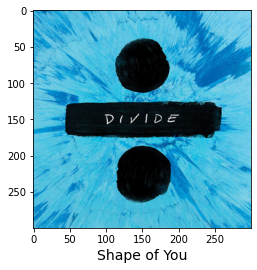

In [84]:
musica = 'Ed Sheeran - Shape of You'
id_musica = dados_gerais[dados_gerais['artists_song']==musica]['id'].iloc[0]

track = sp.track(id_musica)
url = track['album']['images'][1]['url']
name = track['name']

image = io.imread(url)
plt.imshow(image)
plt.xlabel(name, fontsize = 14)
plt.show()

# Recomendador

Aqui há a criação de uma função que realiza as outras operação já criadas. O objetivo é criar uma função para refazer o processo de recomendação. 

In [85]:
def recommend_id(playlist_id):
  url = []
  name = []
  for i in playlist_id:
    track = sp.track(i)
    url.append(track['album']['images'][1]['url'])
    name.append(track['name'])
  return name, url


In [102]:
name, url = recommend_id(recomendada['id'])

In [103]:
name

['Shape of You',
 'Hear Me Calling',
 'Be Kind (with Halsey)',
 'Will - Remix',
 'WRONG (feat. Lil Mosey)',
 'House Arrest Tingz',
 'Paranoia (feat. Gunna & Young Thug)',
 'South of the Border (feat. Camila Cabello & Cardi B)',
 '1.5',
 'What It Is (feat. Chris Brown)']

In [112]:

def visualize_songs(name, url):

    plt.figure(figsize=(15,10))
    columns = 5

    for i, u in enumerate(url): 
        # define o ax como o subplot, com a divisão que retorna inteiro do número urls pelas colunas + 1 (no caso, 6)
        ax = plt.subplot(len(url) // columns + 1, columns, i + 1)

        # Lendo a imagem com o Scikit Image
        image = io.imread(u)

        # Mostra a imagem
        plt.imshow(image)

        # Para deixar o eixo Y invisível 
        ax.get_yaxis().set_visible(False)

        # xticks define o local que vamos trocar os rótulos do eixo x, nesse caso, deixar os pontos de marcação brancos
        plt.xticks(color = 'w', fontsize = 0.1)

        # yticks define o local que vamos trocar os rótulos do eixo y, nesse caso, deixar os pontos de marcação brancos
        plt.yticks(color = 'w', fontsize = 0.1)

        # Colocando o nome da música no eixo x
        plt.xlabel(name[i], fontsize = 8)

        # Faz com que todos os parâmetros se encaixem no tamanho da imagem definido
        plt.tight_layout(h_pad=0.7, w_pad=0)

        # Ajusta os parâmetros de layout da imagem.
        # wspace = A largura do preenchimento entre subparcelas, como uma fração da largura média dos eixos.
        # hspace = A altura do preenchimento entre subparcelas, como uma fração da altura média dos eixos.
        plt.subplots_adjust(wspace=None, hspace=None)

        # Remove os ticks - marcadores, do eixo x, sem remover o eixo todo, deixando o nome da música.
        plt.tick_params(bottom = False)

        # Tirar a grade da imagem, gerada automaticamente pelo matplotlib
        plt.grid(visible=None)
    plt.show()

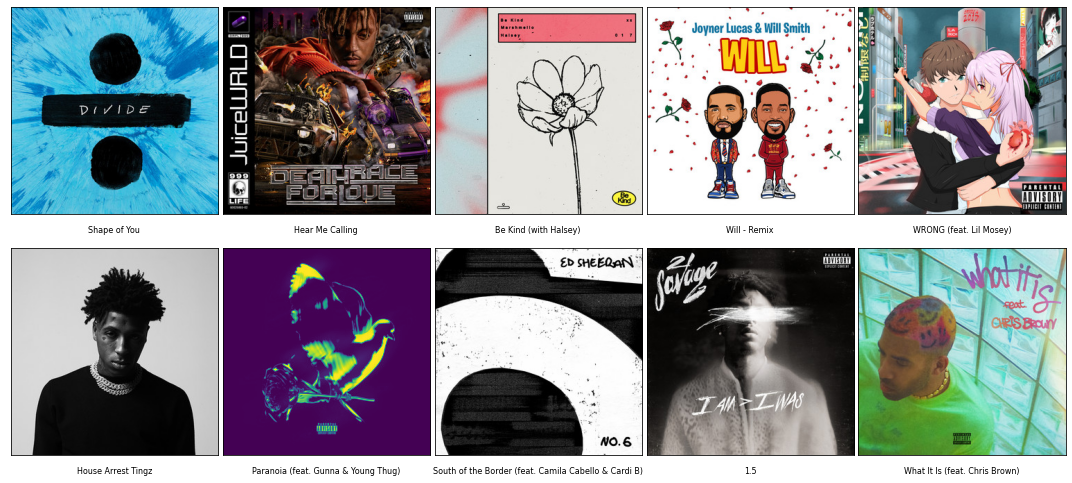

In [113]:
visualize_songs(name, url)

In [126]:
def recomendador(nome_musica):
  musica = nome_musica
  cluster = list(projection_m[projection_m['artists_song'] == musica]['clusters_pca'])[0]
  musicas_recomendadas = projection_m[projection_m['clusters_pca'] == cluster][[0, 1,2,'artists_song']]
  x = list(projection_m[projection_m['artists_song']==musica][0])[0]
  y = list(projection_m[projection_m['artists_song']==musica][1])[0]
  z = list(projection_m[projection_m['artists_song']==musica][2])[0]
  distancia = euclidean_distances(musicas_recomendadas[[0,1]], [[x, y]])

  musicas_recomendadas['distancia'] = distancia
  musicas_recomendadas['id'] = dados_gerais['id']
  recomendada = musicas_recomendadas.sort_values('distancia').head(10)

  playlist_id = recomendada['id']
  url = []
  name = []
  for i in playlist_id:
    track = sp.track(i)
    url.append(track['album']['images'][1]['url'])
    name.append(track['name'])

  plt.figure(figsize=(15,10))
  columns = 5

  for i, u in enumerate(url): 
    ax = plt.subplot(len(url) // columns + 1, columns, i + 1)

    image = io.imread(u)

    plt.imshow(image)

    ax.get_yaxis().set_visible(False)

    plt.xticks(color = 'w', fontsize = 0.1)

    plt.yticks(color = 'w', fontsize = 0.1)

    plt.xlabel(name[i], fontsize = 8)
    plt.tight_layout(h_pad=0.7, w_pad=0)

    plt.subplots_adjust(wspace=None, hspace=None)

    plt.tick_params(bottom = False)

    plt.grid(visible=None)
  plt.show()

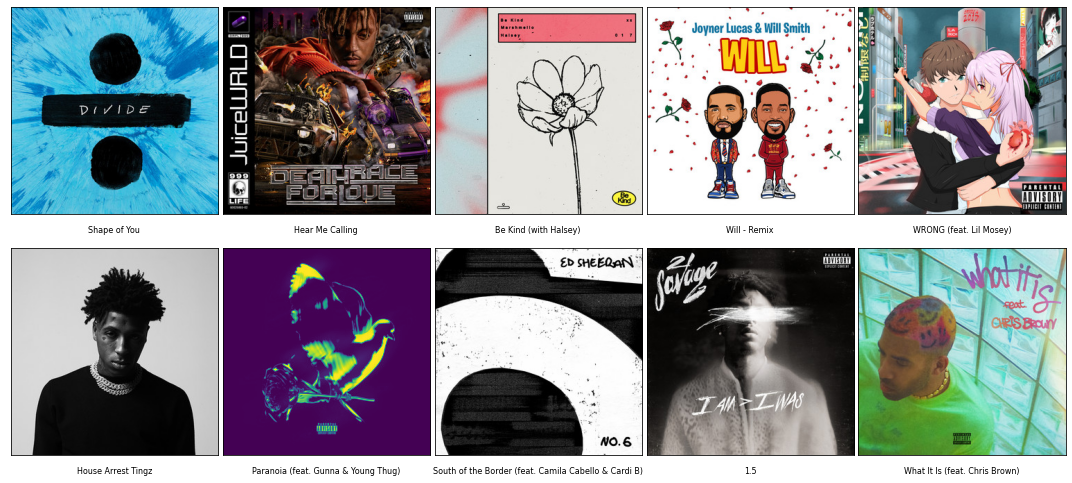

In [127]:
recomendador('Ed Sheeran - Shape of You')

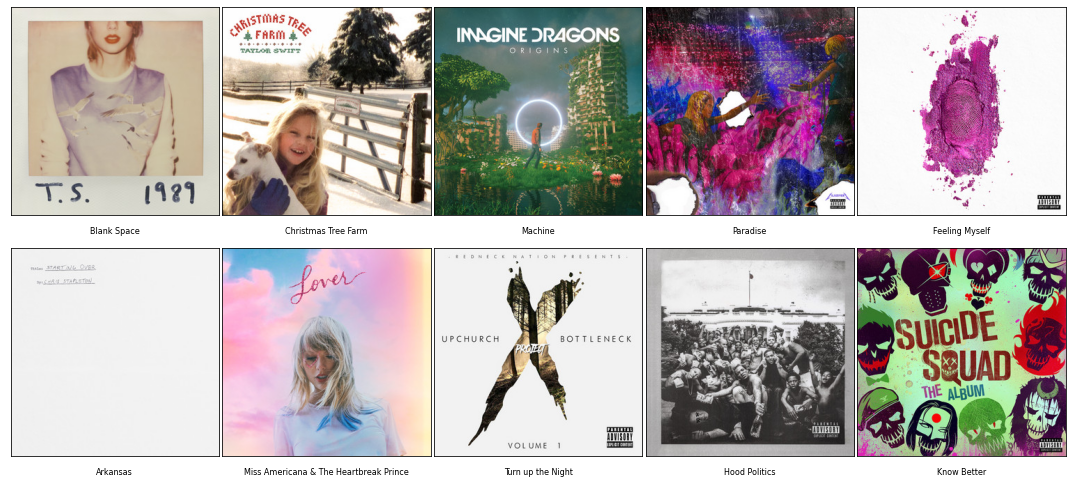

In [128]:
recomendador('Taylor Swift - Blank Space')